## Introduction

Let $u = \sin{(\pi x)} \sin{(\pi y)}$. 

PDE $-u_{xx} - u_{yy} = f$ on boundary $\Omega = (0,1) \times (0,1)$, $u=0$ at boundary. Assume $\Delta x = \Delta y = h$

Approximation is then $F_{ij} = -\frac{1}{h^2}\big(u_{i-1j} - 2u_{ij} + u_{i+1j}\big) -\frac{1}{h^2} \big(u_{ij-1} - 2u_{ij} + u_{ij+1}\big)$, where $h$ is (uniform) mesh size

Or equivalently $T \mathbf{U} + \mathbf{U} T = F$, where $u_{ij} = u(x_i, y_j)$ with interior nodes $i,j=1,\dots,n$ and $T = \frac{-1}{h^2} \text{tridiag}(1,-2,1)$

$\frac{-1}{h^2} 
\begin{pmatrix}
-2 & 1 & 0 & \dots & 0 & 0 \\
1 & -2 & 1 & \dots & 0 & 0 \\
0 & 1 & -2 & \dots & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & \dots & -2 & 1 \\
0 & 0 & 0 & \dots & 1 & -2 \\
\end{pmatrix}
\begin{pmatrix}
u_{11} & u_{12} & \dots & u_{1j} & \dots & u_{1n} \\
u_{21} & u_{22} & \dots & u_{2j} & \dots & u_{2n} \\
\vdots & \vdots & \ddots & \vdots & \dots & \vdots \\
u_{i1} & u_{i2} & \dots & u_{ij} & \dots & u_{in} \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
u_{n1} & u_{n2} & \dots & u_{nj} & \dots & u_{nn}
\end{pmatrix}
+
\begin{pmatrix}
u_{11} & u_{12} & \dots & u_{1j} & \dots & u_{1n} \\
u_{21} & u_{22} & \dots & u_{2j} & \dots & u_{2n} \\
\vdots & \vdots & \ddots & \vdots & \dots & \vdots \\
u_{i1} & u_{i2} & \dots & u_{ij} & \dots & u_{in} \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
u_{n1} & u_{n2} & \dots & u_{nj} & \dots & u_{nn}
\end{pmatrix}
\frac{-1}{h^2} 
\begin{pmatrix}
-2 & 1 & 0 & \dots & 0 & 0 \\
1 & -2 & 1 & \dots & 0 & 0 \\
0 & 1 & -2 & \dots & 0 & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & 0 & \dots & -2 & 1 \\
0 & 0 & 0 & \dots & 1 & -2 \\
\end{pmatrix}
= \mathbf{F}(\mathbf{U})
$

System has $n^2$ unknowns, need to solve $T \mathbf{U} + \mathbf{U} T = \mathbf{F}(\mathbf{U})$

## Solving using scipy.linalg solve_sylvester

Time:  20.599725008010864
Error inf:  8.208322000990975e-07
Error sq:  4.1041401069454766e-07
Function error:  0.004550163309522226


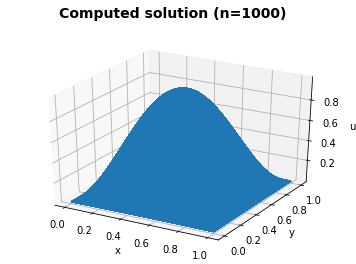

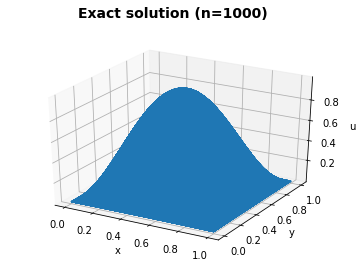

In [31]:
#Import necessary modules
import numpy as np
import scipy as sp
from scipy.sparse import diags
from scipy.linalg import solve_sylvester #computes solution to AX + XB = Q
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import time
import pylab

#Define parameters
n = 1000 #number of internal nodes in each direction (number of unknowns)
N = n+2 #total number of nodes in each direction (includes boundaries)
h = 1/(n+1) #step size

#Define x and y as arrays between 0 and 1 with n evenly spaced points (internal nodes)
x = np.linspace(h, 1-h, n)
y = np.linspace(h, 1-h, n)

#Create internal mesh (excludes boundaries)
X, Y = np.meshgrid(x, y, indexing='ij')

#Define F 
F = 2 * np.pi**2 * np.sin(np.pi*X) * np.sin(np.pi*Y)    
        
#Define tridiagonal matrix T
diagonals = [[-2],[1],[1]]
T = np.multiply((-1)/(h**2), diags(diagonals, [0, -1, 1], shape=(n, n)).toarray())

#Solve system
start_time = time.time()
U = solve_sylvester(T, T, F)
end_time = time.time()
time = end_time - start_time

#Compute exact solution for comparison
U_exact = np.sin(np.pi*X) * np.sin(np.pi*Y)
        
#Plot computed solution
plt.figure(0)
plt.suptitle('Computed solution (n=' + str(n) +')', fontsize=14, fontweight='bold')
ax = plt.axes(projection='3d')
xline = np.reshape(X, -1)
yline = np.reshape(Y, -1)
zline = np.reshape(U, -1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
ax.plot3D(xline, yline, zline)

#Plot actual solution
plt.figure(1)
plt.suptitle('Exact solution (n=' + str(n) +')', fontsize=14, fontweight='bold')
ax = plt.axes(projection='3d')
xline = np.reshape(X, -1)
yline = np.reshape(Y, -1)
zline = np.reshape(U_exact, -1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
ax.plot3D(xline, yline, zline)

#Compare computed solution against F
F_computed = np.reshape(np.matmul(T,U) + np.matmul(U,T), -1)
F = np.reshape(F,-1)
function_error = 0
for i in range(0,n**2):
    function_error += np.absolute(F[i]-F_computed[i])

#Compute error at each node
error_inf = 0
error_sq = 0
for i in range(0,n):
    for j in range(0,n):
        error_sq += np.absolute(U_exact[i][j] - U[i][j])**2
        if np.absolute(U_exact[i][j] - U[i][j]) > error_inf:
            error_inf = np.absolute(U_exact[i][j] - U[i][j])
        
error_sq = (error_sq * h**2)**0.5

print('Time: ', time)
print('Error inf: ', error_inf)
print('Error sq: ', error_sq)
print("Function error: ", function_error)


## Solving using similarity transformations

Solving Sylvester equation: $A \mathbf{U} + \mathbf{U} B = F$ 

Solution $\mathbf{U}$ in closed form: Assuming matrices $A$ and $B$ can be diagonalised, $P^{-1}AP = \text{diag}(\lambda_1, \dots, \lambda_n)$ and $Q^{-1} B Q = \text{diag}(\mu_1, \dots, \mu_m)$,

then $\tilde{F} = P^{-1}FQ$ and $\mathbf{U} = P \tilde{\mathbf{U}} Q^{-1}$, with $\tilde{\mathbf{u}}_{ij} = \frac{\tilde{f}_{ij}}{\lambda_i + \mu_j}$.

For $T\mathbf{U} + \mathbf{U}T = F$, $A=B=T \implies P=Q$, so $\tilde{F} = P C P^{-1}$
and solution $\mathbf{U} = P \tilde{\mathbf{U}} P^{-1}$ with $\tilde{\mathbf{u}}_{ij} = \frac{\tilde{f}_{ij}}{\lambda_i + \lambda_j}$

Time:  26.09804081916809
Error inf:  2.0559621927151994e-07
Error sq:  1.0276654437379967e-07

Eig:  15.457111120223999
Diag:  0.005645751953125
F:  1.5614221096038818
U:  7.585813999176025
Sol:  1.4880478382110596


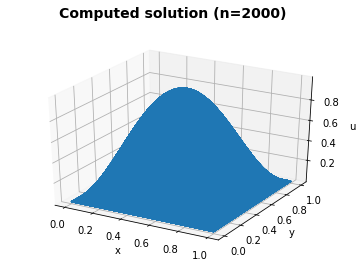

In [1]:
#Import necessary modules
import numpy as np
from scipy.sparse import diags
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
import time

#Define parameters
n = 2000 #number of internal nodes in each direction (number of unknowns)
N = n+2 #total number of nodes in each direction (includes boundaries)
h = 1/(n+1) #step size

#Define x and y as arrays between 0 and 1 with n evenly spaced points (internal nodes)
x = np.linspace(h, 1-h, n)
y = np.linspace(h, 1-h, n)

#Create internal mesh (excludes boundaries)
X, Y = np.meshgrid(x, y, indexing='ij')

#Define F 
F = 2 * np.pi**2 * np.sin(np.pi*X) * np.sin(np.pi*Y)   
        
#Define tridiagonal matrix T
diagonals = [[-2],[1],[1]]
T = np.multiply(-1/h**2, diags(diagonals, [0, -1, 1], shape=(n, n)).toarray())

start_time = time.time()

#Get eigenvalues and eigenvectors of T
eigvals, eigvecs = np.linalg.eig(T)

eig_time = time.time()

#Set eigenvalues as diagonal matrix
diag = diags(eigvals, 0, shape=(n, n)).toarray()

#Set basis matrix M, with columns as the eigenvectors
P = eigvecs

#Check to see if M^-1 * T * M == diag
# P_computed = np.matmul(np.matmul(np.linalg.inv(P),T),P)

diag_time = time.time()

# equivalent = True
# for i in range(0,n):
#     for j in range(0,n):
#         if(np.absolute(diag[i][j]-P_computed[i][j])>000000000000.1):
#             equivalent = False
# if (equivalent==True):
#     print('Matrices are the same')

#Define F_hat = P^-1 * F * P
F_hat = np.matmul(np.matmul(np.linalg.inv(P),F),P)

F_time = time.time()

#Calculate U_hat, u_hat(i,j) = f(i,j) / eigval(i) + eigval(j)
U_hat = np.empty([n,n])
for i in range(0,n):
    for j in range(0,n):
        if (eigvals[i]!=0 or eigvals[j]!=0):
            U_hat[i][j] = F_hat[i][j] / (eigvals[i]+eigvals[j])
        else:
            U_hat[i][j] = 0
            
U_time = time.time()
        
#Calculate solution U = M * U^hat * M^-1
U = np.matmul(np.matmul(P,U_hat),np.linalg.inv(P))

end_time = time.time()
time = end_time - start_time

#Compute exact solution for comparison
U_exact = np.sin(np.pi*X) * np.sin(np.pi*Y)

#Plot solution
plt.figure(0)
plt.suptitle('Computed solution (n=' + str(n) +')', fontsize=14, fontweight='bold')
ax = plt.axes(projection='3d')
xline = np.reshape(X, -1)
yline = np.reshape(Y, -1)
zline = np.reshape(U, -1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
ax.plot3D(xline, yline, zline)

#Compare computed solution against F
F_computed = np.reshape(np.matmul(T,U) + np.matmul(U,T),-1)
F = np.reshape(F,-1)
function_error = 0
for i in range(0,n**2):
    function_error += np.absolute(F[i]-F_computed[i])
    

#Compute error at each node
error_inf = 0
error_sq = 0
for i in range(0,n):
    for j in range(0,n):
        error_sq += np.absolute(U_exact[i][j] - U[i][j])**2
        if np.absolute(U_exact[i][j] - U[i][j]) > error_inf:
            error_inf = np.absolute(U_exact[i][j] - U[i][j])
        
error_sq = (error_sq * h**2)**0.5

print('Time: ', time)
print('Error inf: ', error_inf)
print('Error sq: ', error_sq)
# print("Function error: ", function_error)

print('\nEig: ', eig_time - start_time)
print('Diag: ', diag_time - eig_time)
print('F: ', F_time - diag_time)
print('U: ', U_time - F_time)
print('Sol: ', end_time - U_time)





### Calculating eigenvalues & eigenvectors explicitly 

In [ ]:
#Import necessary modules
import numpy as np
from scipy.sparse import diags
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
import time

#Define parameters
n = 10000 #number of internal nodes in each direction (number of unknowns)
N = n+2 #total number of nodes in each direction (includes boundaries)
h = 1/(n+1) #step size

#Define x and y as arrays between 0 and 1 with n evenly spaced points (internal nodes)
x = np.linspace(h, 1-h, n)
y = np.linspace(h, 1-h, n)

#Create internal mesh (excludes boundaries)
X, Y = np.meshgrid(x, y, indexing='ij')

#Define F 
F = 2 * np.pi**2 * np.sin(np.pi*X) * np.sin(np.pi*Y)  
        
#Define tridiagonal matrix T
diagonals = [[-2],[1],[1]]
T = np.multiply(-1/h**2, diags(diagonals, [0, -1, 1], shape=(n, n)).toarray())

start_time = time.time()

eigvals = np.empty(n)
eigvecs = np.empty([n,n])

for i in range(0,n):
    eigvals[i] = (T[0][0] - T[0][0]*np.cos((i+1)*np.pi/(n+1)))
    for j in range(0,n):
        eigvecs[i][j] = np.sqrt(2/(n+1))*np.sin(((i+1)*(j+1)*np.pi)/(n+1))
            

eig_time = time.time()

#Set eigenvalues as diagonal matrix
diag = diags(eigvals, 0, shape=(n, n)).toarray()

#Set basis matrix M, with columns as the eigenvectors
P = eigvecs

diag_time = time.time()

#Define F_hat = P^-1 * F * P
F_hat = np.matmul(np.matmul(np.linalg.inv(P),F),P)

F_time = time.time()

#Calculate U_hat, u_hat(i,j) = f(i,j) / eigval(i) + eigval(j)
U_hat = np.empty([n,n])
for i in range(0,n):
    for j in range(0,n):
        if (eigvals[i]!=0 or eigvals[j]!=0):
            U_hat[i][j] = F_hat[i][j] / (eigvals[i]+eigvals[j])
        else:
            U_hat[i][j] = 0
            
U_time = time.time()
        
#Calculate solution U = M * U^hat * M^-1
U = np.matmul(np.matmul(P,U_hat),np.linalg.inv(P))

end_time = time.time()
time = end_time - start_time

#Compute exact solution for comparison
U_exact = np.sin(np.pi*X) * np.sin(np.pi*Y)

#Plot solution
plt.figure(0)
plt.suptitle('Computed solution (n=' + str(n) +')', fontsize=14, fontweight='bold')
ax = plt.axes(projection='3d')
xline = np.reshape(X, -1)
yline = np.reshape(Y, -1)
zline = np.reshape(U, -1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
ax.plot3D(xline, yline, zline)

#Compare computed solution against F
F_computed = np.reshape(np.matmul(T,U) + np.matmul(U,T),-1)
F = np.reshape(F,-1)
function_error = 0
for i in range(0,n**2):
    function_error += np.absolute(F[i]-F_computed[i])

#Compute error at each node
error_inf = 0
error_sq = 0
for i in range(0,n):
    for j in range(0,n):
        error_sq += np.absolute(U_exact[i][j] - U[i][j])**2
        if np.absolute(U_exact[i][j] - U[i][j]) > error_inf:
            error_inf = np.absolute(U_exact[i][j] - U[i][j])
        
error_sq = (error_sq * h**2)**0.5

print('Time: ', time)
print('Error inf: ', error_inf)
print('Error sq: ', error_sq)

print('\nEig: ', eig_time - start_time)
print('Diag: ', diag_time - eig_time)
print('F: ', F_time - diag_time)
print('U: ', U_time - F_time)
print('Sol: ', end_time - U_time)






Time:  1190.2879660129547
Error inf:  8.285703456678561e-09
Error sq:  4.14177415232799e-09

Eig:  416.39008593559265
Diag:  0.08825802803039551
F:  227.01063799858093
U:  302.53130292892456
Sol:  244.26768112182617


## Solving using Bartels-Stewart algorithm
To solve $A \mathbf{U} + \mathbf{U} B = F$:
1. Compute the Schur forms $A^* = PRP^*$, $B=QSQ^*$
2. Solve $R^* \mathbf{V} + \mathbf{V} S = P^* F Q$ for $\mathbf{V}$
3. Compute $\mathbf{U} = P \mathbf{V} Q^*$

For $T \mathbf{U} + \mathbf{U} T = F$, $A=B=T$ and $T^* = T$:
1. Compute the Schur form $T = PRP^*$
2. Solve $R^* \mathbf{V} + \mathbf{V}R = P^* F P$ for $\mathbf{V}$
3. Compute $\mathbf{U} = P \mathbf{V} P^*$


### Standard forward substitution

Time:  1449.5697100162506
Error inf:  8.208343762472481e-07
Error sq:  4.104140107105692e-07


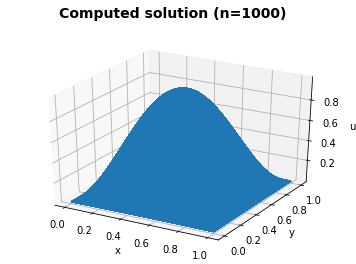

In [4]:
#Import necessary modules
import numpy as np
from scipy.sparse import diags
from scipy.linalg import schur
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
import time

#Define parameters
n = 1000 #number of internal nodes in each direction (number of unknowns)
N = n+2 #total number of nodes in each direction (includes boundaries)
h = 1/(n+1) #step size

#Define x and y as arrays between 0 and 1 with n evenly spaced points (internal nodes)
x = np.linspace(h, 1-h, n)
y = np.linspace(h, 1-h, n)

#Create internal mesh (excludes boundaries)
X, Y = np.meshgrid(x, y, indexing='ij')

#Define F 
F = 2 * np.pi**2 * np.sin(np.pi*X) * np.sin(np.pi*Y)
        
#Define tridiagonal matrix T
diagonals = [[-2],[1],[1]]
T = np.multiply(-1/h**2, diags(diagonals, [0, -1, 1], shape=(n, n)).toarray())

start_time = time.time()

#Compute Schur decomposition
R, P = schur(T)
R_trans = R.transpose()

#Solve R^*V + VR = P^*FP for V
V = np.empty([n,n])
RHS = np.matmul(np.matmul(P.transpose(),F),P)

for i in range(0,n):
    for j in range(0,n):
        
        sum1 = 0
        sum2 = 0
        
        for a in range(0,i-1):
            sum1 += R_trans[i][a]*V[a][j]
            
        for b in range(0,j-1):
            sum2 += V[i][b]*R[b][j]

        V[i][j] = (RHS[i][j] - sum1 - sum2)/(R_trans[i][i]+R[j][j])            

#Compute U=PVP^*
U = np.matmul(np.matmul(P,V),P.transpose())

end_time = time.time()
time = end_time - start_time

#Compute exact solution for comparison
U_exact = np.sin(np.pi*X) * np.sin(np.pi*Y)

#Plot solution
plt.figure(0)
plt.suptitle('Computed solution (n=' + str(n) +')', fontsize=14, fontweight='bold')
ax = plt.axes(projection='3d')
xline = np.reshape(X, -1)
yline = np.reshape(Y, -1)
zline = np.reshape(U, -1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
ax.plot3D(xline, yline, zline)

#Compare computed solution against F
F_computed = np.reshape(np.matmul(T,U) + np.matmul(U,T),-1)
F = np.reshape(F,-1)
function_error = 0
for i in range(0,n**2):
    function_error += np.absolute(F[i]-F_computed[i])

#Compute error at each node
error_inf = 0
error_sq = 0
for i in range(0,n):
    for j in range(0,n):
        error_sq += np.absolute(U_exact[i][j] - U[i][j])**2
        if np.absolute(U_exact[i][j] - U[i][j]) > error_inf:
            error_inf = np.absolute(U_exact[i][j] - U[i][j])
        
error_sq = (error_sq * h**2)**0.5

print('Time: ', time)
print('Error inf: ', error_inf)
print('Error sq: ', error_sq)
# print("Function error: ", function_error)





## Solving linear system directly (scipy.sparse.linalg.spsolve)

Total time:  0.002154827117919922
Error inf:  0.006686828307991721
Error sq:  0.003412529872794861


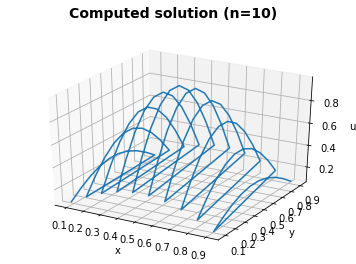

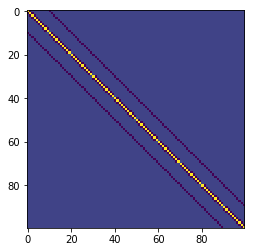

In [16]:
#Import necessary modules
import numpy as np
from scipy.sparse import diags, csr_matrix, kron
from scipy.sparse.linalg import spsolve
from scipy.linalg import schur
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
import time

#Define parameters
n = 10 #number of internal nodes in each direction (number of unknowns)
N = n+2 #total number of nodes in each direction (includes boundaries)
h = 1/(n+1) #step size

#Define x and y as arrays between 0 and 1 with n evenly spaced points (internal nodes)
x = np.linspace(h, 1-h, n)
y = np.linspace(h, 1-h, n)

#Create internal mesh (excludes boundaries)
X, Y = np.meshgrid(x, y, indexing='ij')

#Compute exact solution for comparison
U_exact = np.sin(np.pi*X) * np.sin(np.pi*Y)
U_exact = np.reshape(U_exact, -1)

#Define F 
F = 2 * np.pi**2 * np.sin(np.pi*X) * np.sin(np.pi*Y)
        
F = np.reshape(F,-1)
        
#Define tridiagonal matrix T
diagonals = [[-2],[1],[1]]
T = np.multiply(-1/h**2, diags(diagonals, [0, -1, 1], shape=(n, n)).toarray())


start_time = time.time()

#Define A = I kron T + T^t kron I
A = kron(np.eye(n),T) + kron(T.transpose(),np.eye(n))

kron_time = time.time()

#Convert to CSR format
A = csr_matrix(A)

conv_time = time.time()

#Solve using scipy sparse solver
U = spsolve(A, F)

solve_time = time.time()

# print('Kron time: ', kron_time - start_time)
# print('Conv time: ', conv_time - kron_time)
# print('Solve time: ', solve_time - conv_time)
print('Total time: ', solve_time - start_time)

#Plot solution
plt.figure(0)
plt.suptitle('Computed solution (n=' + str(n) +')', fontsize=14, fontweight='bold')
ax = plt.axes(projection='3d')
xline = np.reshape(X, -1)
yline = np.reshape(Y, -1)
zline = U
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u')
ax.plot3D(xline, yline, zline)

#Compute error at each node
error_inf = 0
error_sq = 0
for i in range(0,n**2):
    error_sq += np.absolute(U_exact[i] - U[i])**2
    if np.absolute(U_exact[i] - U[i]) > error_inf:
        error_inf = np.absolute(U_exact[i] - U[i])
        
error_sq = (error_sq * h**2)**0.5

print('Error inf: ', error_inf)
print('Error sq: ', error_sq)
# print("Function error: ", function_error)

plt.figure(1)
plt.imshow(A.todense())




## Integral of exponentials

$\mathbf{X} = -\frac{1}{4\pi^2} \int_0^{\infty} e^{At}Ce^{Bt}\; dt$, where $e^{Ht}$ is the matrix exponential of $Ht$.

In this case:
$\mathbf{U} = -\frac{1}{4\pi^2} \int_0^{\infty} e^{Tt}Fe^{Tt}\; dt$.

In [27]:
#Import necessary modules
import numpy as np
from scipy.sparse import diags
from scipy.linalg import schur, expm
from scipy.integrate import quad
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline
import time

def integrand(t, T, F):
    return np.matmul(np.matmul(expm(T*t),F), expm(T*t))

#Define parameters
N = 11 #total number of nodes in each direction
n = N-2 #number of internal nodes in each direction (unknowns)
h = 1/(N-1) #step size

#Define x and y as arrays between 0 and 1 with n evenly spaced points (internal nodes)
x = np.linspace(h, 1-h, n)
y = np.linspace(h, 1-h, n)

#Create internal mesh (excludes boundaries)
X, Y = np.meshgrid(x, y, indexing='ij')

#Compute exact solution for comparison
U_exact = X*(1-X) + Y*(1-Y)

#Define F 
F = np.empty([n,n])
for i in range(0, n):
    for j in range(0, n):
        F[i][j] = 4
        
#Define tridiagonal matrix T
diagonals = [[-2],[1],[1]]
T = np.multiply(-1/h**2, diags(diagonals, [0, -1, 1], shape=(n, n)).toarray())

# U = -1/(4*np.pi**2)*
I = quad(integrand, 0, np.inf, args=(T,F))

TypeError: only size-1 arrays can be converted to Python scalars